In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from google.colab import files
%matplotlib inline

In [367]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

In [368]:
df=pd.read_csv("/content/Algerian_forest_fires_dataset_UPDATE2.csv")

In [369]:
df.head()

,Unnamed: 0,temperature,rh,ws,rain,ffmc,dmc,dc,isi,fwi,classes,region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,0.5,0,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,0.4,0,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,0.1,0,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,0.0,0,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,0.5,0,0


In [370]:
from sklearn.linear_model import LassoCV

In [371]:
def standardize_data(x,y,scaler):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=142)
  x_train_scaled=scaler.fit_transform(x_train)
  x_test_scaled=scaler.transform(x_test)
  return x_train_scaled,x_test_scaled,y_train,y_test

In [386]:
def model_prediction(x,y,scaler,modesl,metrics):
  x_train,x_test,y_train,y_test=standardize_data(x,y,scaler)
  for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    model_name=model.__class__.__name__
    print(f"--model evaluation of {model_name}--")
    print(f"model parameters : \n{model.get_params()}")
    for metric in metrics:
      print(f"{metric.__name__} : {metric(y_test,y_pred)}")
    plt.scatter(x=y_test,y=y_pred)
    plt.xlabel("y_test")
    plt.ylabel("y_pred")
    plt.show()

--model evaluation of LinearRegression--
model parameters : 
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
mean_absolute_error : 0.6736011682769913
mean_squared_error : 1.0518253408198155
r2_score : 0.9841639394014307


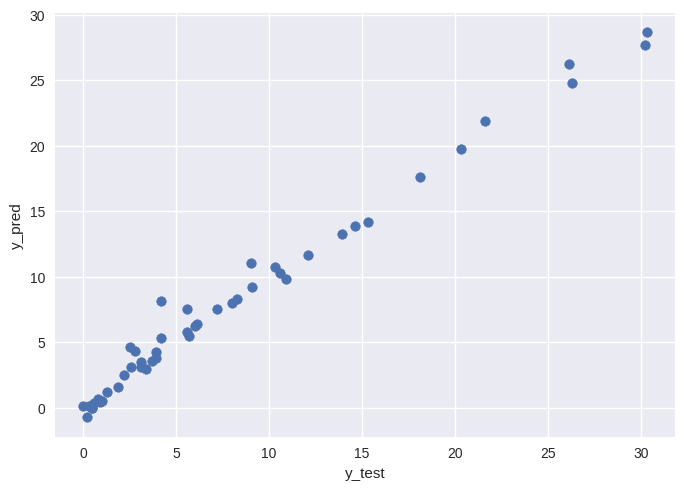

--model evaluation of Lasso--
model parameters : 
{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
mean_absolute_error : 1.4757378254802185
mean_squared_error : 3.894840615499714
r2_score : 0.9413601007551797


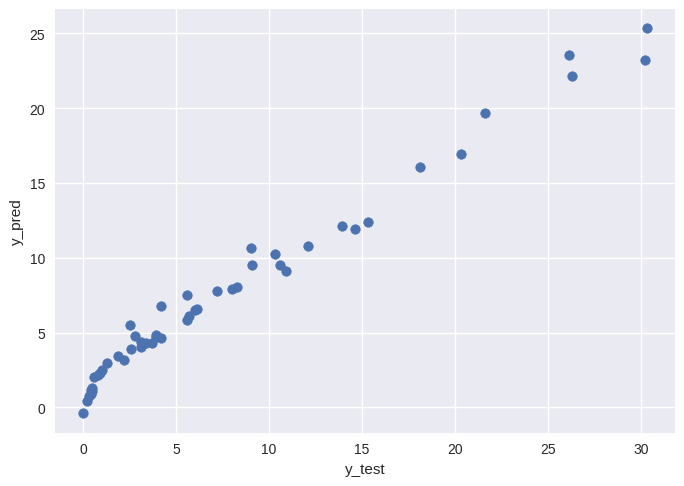

--model evaluation of Ridge--
model parameters : 
{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
mean_absolute_error : 0.6879889022220951
mean_squared_error : 1.1080229599214015
r2_score : 0.9833178398951243


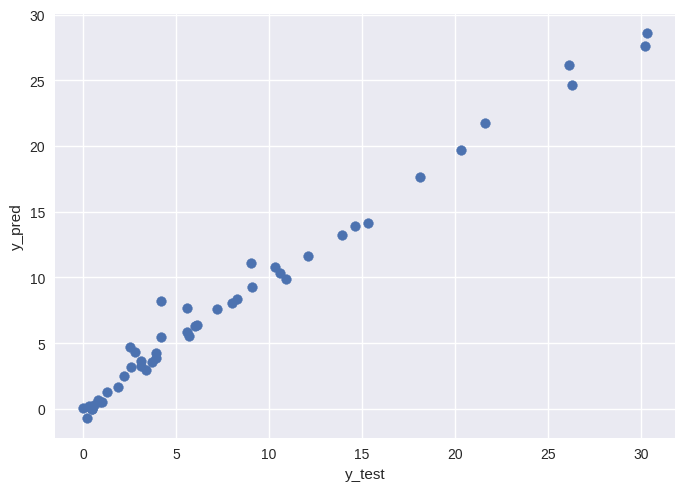

--model evaluation of ElasticNet--
model parameters : 
{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
mean_absolute_error : 2.152901534548251
mean_squared_error : 8.060717940022116
r2_score : 0.8786395299559219


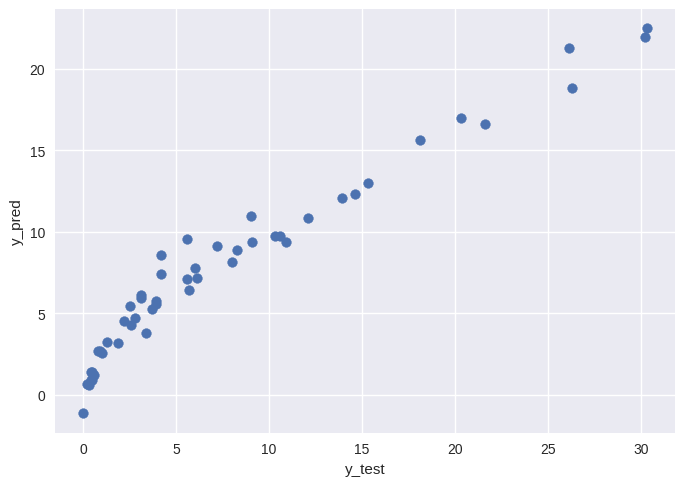

In [388]:
models=[LinearRegression(),Lasso(),Ridge(),ElasticNet()]
metrics=[mean_absolute_error,mean_squared_error,r2_score]
scaler=StandardScaler()
x=df.drop("fwi",axis=1)
y=df["fwi"]
model_prediction(x,y,scaler,models,metrics)

In [374]:
from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV

--model evaluation of LassoCV--
mean_absolute_error : 0.6430833103485133
mean_squared_error : 1.0845809837355913
r2_score : 0.9836707773468304


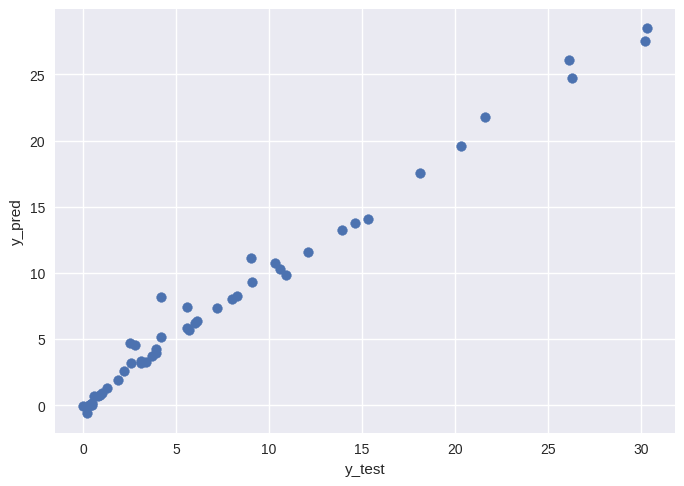

--model evaluation of RidgeCV--
mean_absolute_error : 0.6879889022220951
mean_squared_error : 1.1080229599214015
r2_score : 0.9833178398951243


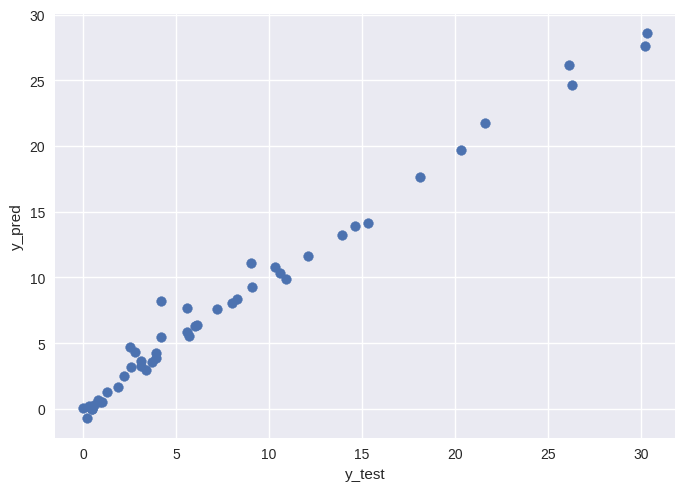

--model evaluation of ElasticNetCV--
mean_absolute_error : 0.6893825310170497
mean_squared_error : 1.1531937159859986
r2_score : 0.9826377585141561


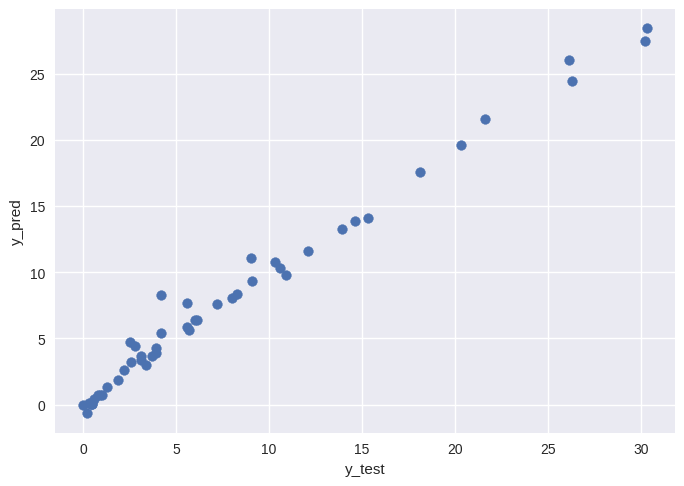

In [383]:
n=5
models=[LassoCV(cv=n),RidgeCV(cv=n),ElasticNetCV(cv=n)]
metrics=[mean_absolute_error,mean_squared_error,r2_score]
scaler=StandardScaler()
x=df.drop("fwi",axis=1)
y=df["fwi"]
model_prediction(x,y,scaler,models,metrics)